<a href="https://colab.research.google.com/github/ghtaro/Fashion_MNIST/blob/master/fashion_mnist_SLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10-Class Categolisation of Fashion MNIST dataset

In [0]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

sys.modules['tensorflow'] = None

## Mount Google Drive

In [0]:
# mount google drive
gd_mount_path = '/content/drive'
from google.colab import drive
drive.mount(gd_mount_path)

## Setup a Path to the Dataset

In [0]:
gd_root_path = '/content/drive/My Drive/Colab Notebooks/Fashion_MNIST/'
gd_material_path = os.path.join(gd_root_path, 'material')
gd_data_path = os.path.join(gd_root_path, 'data')
gd_output_path = os.path.join(gd_root_path, 'output')
sys.path.append(gd_material_path)

gd_utils_path = '/content/drive/My Drive/Colab Notebooks/Utils'
gd_pictures_path = '/content/drive/My Drive/Colab Notebooks/Pictures'

sys.path.append(gd_utils_path)
sys.path.append(gd_pictures_path)

try:
    del sys.modules['tool']
except Exception as e:
    pass
import tool


## Utility functions

In [0]:
# weights and eps
W = np.random.uniform(low=-0.08, high=0.08, size=(784, 10)).astype('float32')
b = np.zeros(shape=(10,)).astype('float32')
eps = 0.01

# Training utils
def valid(x, t):
    y = tool.softmax(np.matmul(x, W) + b)
    cost = (- t * tool.np_log(y)).sum(axis=1).mean()
    return cost, y

def pred(x):
    y = tool.softmax(np.matmul(x, W) + b)
    return y.argmax(axis=1)

# Learning
def train(x, t, doNorm=False, nBatch=1):
    global W, b, eps
    batch_size = int(x.shape[0] / nBatch)
    x_remain = np.copy(x)    
    t_remain = np.copy(t)
    curr_size = x.shape[0]
    prev_cost = 10000000
    while(curr_size > 0):
        batch_size = np.min([batch_size, curr_size])
        x_batch = x_remain[:batch_size, :]
        t_batch = t_remain[:batch_size, :]
        y_batch = tool.softmax(np.matmul(x_batch, W) + b)
        cost = (- t_batch * tool.np_log(y_batch)).sum(axis=1).mean()
        delta = y_batch - t_batch
        dW = np.matmul(x_batch.T, delta) / batch_size
        db = np.matmul(np.ones(shape=(batch_size,)), delta) / batch_size
        W -= eps * dW
        b -= eps * db
        curr_size -= batch_size
        
        if curr_size > 0:
            x_remain = x_remain[batch_size:, :]
            t_remain = t_remain[batch_size:, :]
    return cost

## Training the Linear-Classifier with Sigmoid Activation

In [0]:
# 学習データと検証データに分割
x_train, y_train, x_test = tool.load_fashionmnist(gd_data_path)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

# Training
def train_full(x_train, x_valid, y_train, y_valid, eps_in=0.001, low=-0.08, high=0.08, doStd=True, nBatch=54000, doNorm=False, \
               doOVO=False, lrDivisor=2, nEpoch=10):
    # fix the random seed
    np.random.seed(1)

    # weights
    global W, b, eps
    W = np.random.uniform(low=low, high=high, size=(784, 10)).astype('float32')
    b = np.zeros(shape=(10,)).astype('float32')
    eps = eps_in

    prev_cost = 10000000
    for epoch in range(nEpoch):
        x_train, y_train = shuffle(x_train, y_train)

        if(doStd):
            x_train = tool.standarisation(x_train)
            x_valid = tool.standarisation(x_valid)

        cost = train(x_train, y_train)

        if prev_cost < cost:
            eps /= lrDivisor
        prev_cost = cost

        cost_train, t_train_pred = valid(x_train, y_train)
        cost_valid, t_valid_pred = valid(x_valid, y_valid)
        acc_valid = accuracy_score(y_valid.argmax(axis=1), t_valid_pred.argmax(axis=1))
        acc_train = accuracy_score(y_train.argmax(axis=1), t_train_pred.argmax(axis=1))
        print('EPOCH: {}, EPS: {:.6f}, Valid Cost: {:.3f}, Valid Accuracy: {:.3f}, Train Cost: {:.3f}, Train Accuracy: {:.3f}'.format( \
            epoch + 1, eps, cost_valid, acc_valid, cost_train, acc_train))

In [7]:
    train_full(x_train, x_valid, y_train, y_valid, eps_in=0.5, low=-0.08, high=0.08, doStd=True, nBatch=5400, doNorm=False, doOVO=False, lrDivisor=2, nEpoch=100)

EPOCH: 1, EPS: 0.500000, Valid Cost: 5.537, Valid Accuracy: 0.467, Train Cost: 5.536, Train Accuracy: 0.462
EPOCH: 2, EPS: 0.250000, Valid Cost: 8.955, Valid Accuracy: 0.381, Train Cost: 8.906, Train Accuracy: 0.380
EPOCH: 3, EPS: 0.125000, Valid Cost: 6.390, Valid Accuracy: 0.490, Train Cost: 6.389, Train Accuracy: 0.494
EPOCH: 4, EPS: 0.125000, Valid Cost: 2.849, Valid Accuracy: 0.533, Train Cost: 2.833, Train Accuracy: 0.537
EPOCH: 5, EPS: 0.125000, Valid Cost: 1.786, Valid Accuracy: 0.623, Train Cost: 1.786, Train Accuracy: 0.627
EPOCH: 6, EPS: 0.125000, Valid Cost: 1.555, Valid Accuracy: 0.719, Train Cost: 1.540, Train Accuracy: 0.718
EPOCH: 7, EPS: 0.125000, Valid Cost: 1.080, Valid Accuracy: 0.717, Train Cost: 1.075, Train Accuracy: 0.715
EPOCH: 8, EPS: 0.125000, Valid Cost: 1.085, Valid Accuracy: 0.713, Train Cost: 1.069, Train Accuracy: 0.707
EPOCH: 9, EPS: 0.125000, Valid Cost: 1.303, Valid Accuracy: 0.677, Train Cost: 1.289, Train Accuracy: 0.681
EPOCH: 10, EPS: 0.062500, Va

In [0]:
#np.save(os.path.join(gd_output_path, "MNIST_SLP_b.npy"), b)

# 誤分類の分析


## Confusion Matrix
- 以下のConfusion Matrixは既に、サンプル数で正規化済み。
- ２を４に誤分類。
- ６を４に誤分類。

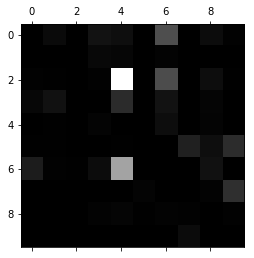

In [20]:
cost_pred, y_pred_score = valid(x_valid, y_valid)
y_pred = pred(x_valid)
y_valid_max = np.argmax(y_valid, axis=1)
tool.show_confmx(y_pred, y_valid_max)

Q1. Skewed Datasetかどうか?クラス６の画像数が少なければ、増やせばよい。

A1. 各クラスの画像数を確認。特に歪んでいない。

In [9]:
for i in range(10):
    n = tool.count_fashion(y_train, i)
    print("number of pictures in " + str(i) + "-th class are " + str(n))

number of pictures in 0-th class are 5413
number of pictures in 1-th class are 5450
number of pictures in 2-th class are 5410
number of pictures in 3-th class are 5429
number of pictures in 4-th class are 5394
number of pictures in 5-th class are 5395
number of pictures in 6-th class are 5389
number of pictures in 7-th class are 5338
number of pictures in 8-th class are 5357
number of pictures in 9-th class are 5425


## データの目視確認
クラス２のサンプル

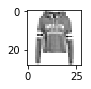

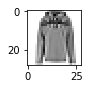

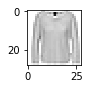

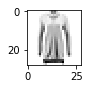

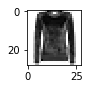

In [14]:
tool.plot_fashion(x_train, y_train, 2, 5, 1)

クラス６のサンプル

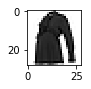

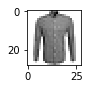

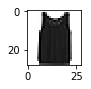

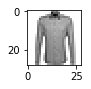

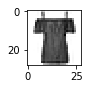

In [15]:
tool.plot_fashion(x_train, y_train, 6, 5, 1)

## 実際クラスが６で、誤分類したサンプルを目視

In [16]:
x_valid_mistake = x_valid[y_pred != y_valid_max]
y_valid_mistake = y_valid[y_pred != y_valid_max]
y_pred_score_mistake = y_pred_score[y_pred != y_valid_max]
print(x_valid_mistake.shape)
print(y_valid_mistake.shape)

(1572, 784)
(1572, 10)


実際はクラス６の画像

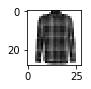

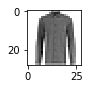

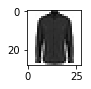

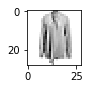

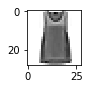

In [17]:
tool.plot_fashion(x_valid_mistake, y_valid_mistake, 6, 5, 1)

スコアを出力、どれも４に誤分類している。４と６で、結構競っているのが分かる。

In [18]:
tool.get_score(y_valid_mistake, y_pred_score_mistake, 6, 5)

answer:4, scores: [5.6303348e-02 3.4177605e-02 1.3963315e-01 3.2977238e-02 1.0000000e+00
 2.3192683e-02 8.0687547e-01 1.1320304e-04 1.6066839e-01 1.6666364e-02]
answer:4, scores: [4.7773995e-02 3.7894983e-02 2.1606641e-01 5.1573887e-02 1.0000000e+00
 4.0145371e-02 8.7989175e-01 5.5868976e-04 1.5999934e-01 2.8373919e-02]
answer:4, scores: [2.7801575e-02 2.2123013e-02 9.1410622e-02 3.1366602e-02 1.0000000e+00
 5.7614665e-03 8.2503664e-01 2.8008417e-05 1.4169404e-01 6.0834177e-03]
answer:4, scores: [0.26190737 0.2029927  0.24961036 0.19004272 1.         0.13235526
 0.5698609  0.0113498  0.532391   0.19046396]
answer:4, scores: [0.3861218  0.28400213 0.21559298 0.43259636 1.         0.0409375
 0.85990435 0.00275009 0.3833798  0.08769212]


## モデル的にもっとも各クラスっぽい画像を出力する
クラス１(ズボン), クラス5(サンダル)っぽい画像を出力。
- サンダルは確かに靴の形に見える。
- ズボンもはっきり見える。

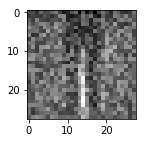

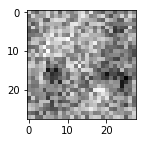

In [21]:
x_eigen1 = W[:,1] # ズボン
x_eigen5 = W[:,5] # サンダル
tool.show_image(x_eigen1,2)
tool.show_image(x_eigen5,2)

次に、クラス２（プルオーバー）、クラス４(コート), クラス６(シャツ)っぽい画像
- コートは少し外形が見える。シャツと、特にプルオーバーは、何がなんだか良くわからない。
- クラス４or６の分類は、以下２つのベクトルの（ユークリッド距離の意味で）どちらに近いか？で決定する。
- 例えば、クラス４ベクトルとクラス６ベクトルの、線形按分したベクトルを考えると、クラス４から、クラス６（またはその逆）にスムーズに移動することができる。

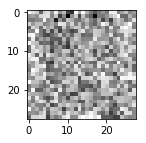

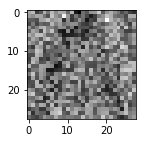

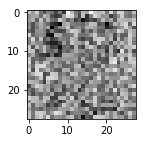

In [23]:
x_eigen2 = W[:,2] # プルオーバー
x_eigen4 = W[:,4] # コート
x_eigen6 = W[:,6] # シャツ
tool.show_image(x_eigen2,2)
tool.show_image(x_eigen4,2)
tool.show_image(x_eigen6,2)